In [121]:
import numpy as np
import matplotlib.pyplot as plt

# **Exact Solution Definition**

Makeham's law is given by $\mu_x=A+Bc^x$. The closed form for ${_{t}p_{x}}$ is given by (Dickson, p.38)
 \begin{equation}
 {_{t}p_{x}}= \exp \left(-tA-\frac{Bc^{x}(c^t-1)}{\log (c)}\right).
 \end{equation}
 In general (Dickson, p.23),

In [122]:
def tpx(t, A, B, c, x):
  z1=-t*A-(B*c**x*(c**t-1))/(np.log(c))
  z2=np.exp(z1)
  return z2

# **Monte Carlo**

We apply the Monte Carlo method as described on page 8 of the paper:

_Luengo, D., Martino, L., Bugallo, M., Elvira, V., & Särkkä, S. (2020). A survey of Monte Carlo methods for parameter estimation. EURASIP Journal on Advances in Signal Processing, 2020(1), 25._

In this case, $\mu_x=A+Bc^x$, we evaluate $\int_{0}^{t} \mu_{x+s}\,ds$ using Monte Carlo integration as follows:
\begin{align}
 \int_{0}^{t} \mu_{x+s}\,ds &= \int_{0}^{t} \frac{f(s)}{f(s)} \mu_{x+s}\,ds \\
 &= \int_{0}^{t} \frac{\mu_{x+s}}{f(s)}f(s) \,ds \\
 &= \mathbb{E} \left(\frac{\mu_{x+s}}{f(s)}\right) \\
 & \approx \frac{1}{N} \sum_{i=1}^{N}\frac{\mu_{x+s_i}}{f(s_i)}
\end{align}

We assume that $s_i \sim \mathcal{U}(0,t)$. That is, $f(s)=\tfrac{1}{t}$.

In [123]:
def Mont1(t,A,B,c,N, x):
  U=np.random.uniform(0,1,N)
  Uab=0+(t-0)*U
  mu1=A+B*c**(x+Uab)
  kern=1/t
  z=np.mean(mu1/kern) #Monte Carlo Integration
  return np.exp(-z)

# **Testing Initial Code**

In [124]:
N=10000
N=10000
t0=0
t2=10
t=t2-t0
x=60
A, B, c = 0.0001, 0.00035, 1.075

print(Mont1(t,A,B,c,N, x))
print(tpx(t, A, B, c, x))

0.6741195750769482
0.6739576751262345


# **Estimating Confidence Interval**

In excel, you can use the formula =NORM.INV(1-B1/2,0,1), given that in cell B1 you have written values like 0.05, 0.01, and 0.10 etc. This calculation can give you values like 1.64, 1.96, 2.576, etc. These values are for the 90\%, 95 \% and 99 \% confidence intervals. Please get these values using Ms-Excel.

In [125]:
Zs90, Zs95, Zs99=1.64, 1.96, 2.756
Niter=300
iter=0
Vec=np.zeros(Niter)
while iter<Niter:
  Vec[iter]= Mont1(t,A,B,c,N, x)
  np.random.seed(iter) # We are Varying random paths here
  iter +=1

probability is 0.6739945137809972 with 95 % CI [np.float64(0.6728410165441137), np.float64(0.6751480110178807)]


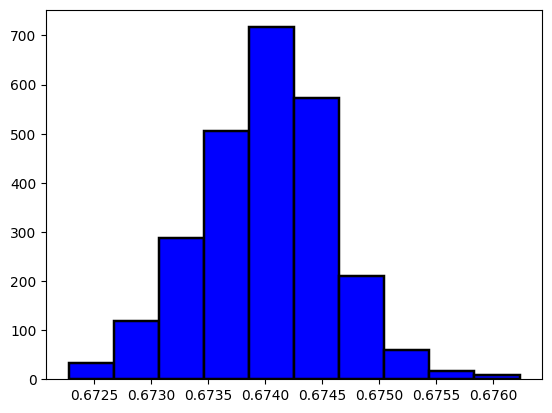

In [126]:
plt.hist(Vec, facecolor="blue", edgecolor="black", density=True,linewidth=1.79)
tpxest=np.mean(Vec)
sigma1=np.std(Vec)
CI=[tpxest-Zs95*sigma1, tpxest+Zs95*sigma1]
print(f"probability is {tpxest} with 95 % CI {CI}")